In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt


In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'data/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [24]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [25]:
!pip install opencv-python



In [26]:
pip install opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


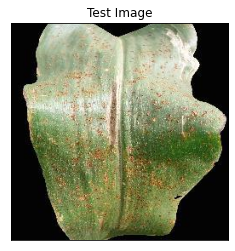

In [27]:
#Test Image Visualization
import cv2
image_path = 'test/CornCommonRust2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


In [29]:
print(predictions)

[[8.5895921e-22 8.0298339e-31 9.8483142e-30 1.4454163e-29 6.9890210e-29
  8.2234676e-28 1.5415004e-27 3.2275376e-21 1.0000000e+00 3.0409819e-27
  5.6220645e-32 1.9579162e-34 1.7553419e-31 1.7747407e-30 2.7596457e-38
  4.6173971e-30 6.2404991e-27 5.9111576e-35 2.8353843e-26 7.7949203e-27
  6.1507258e-23 5.0509259e-38 2.9616474e-25 9.4970604e-34 2.6391306e-34
  1.6205178e-31 6.3834162e-21 4.0189645e-33 0.0000000e+00 3.8699562e-26
  1.1597382e-21 7.4055613e-31 3.6096044e-26 0.0000000e+00 1.5359137e-33
  0.0000000e+00 6.1519729e-37 2.7860000e-26]]


# Testing Model

In [32]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


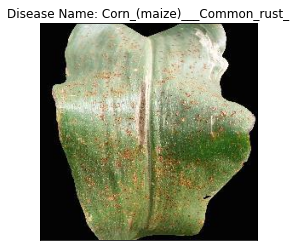

In [33]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()